In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as col
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.optimize import minimize

#Примеры работы алгоритма

In [2]:
sub_similarity = pd.read_csv("similarity.csv")
sub_similarity.head()

,Вероятность схожести,Расстояние между предметами,Предмет 1,Предмет 2
0,7.156021e-01,0.334631,Алгоритмы и структуры данных 4,Практикум по математическому анализу 2 4
1,4.560816e-10,21.508349,Алгоритмы и структуры данных 4,Алгебра 4
2,2.365310e-09,19.862357,Алгоритмы и структуры данных 4,Линейная алгебра и геометрия 4
3,4.603071e-10,21.499127,Алгоритмы и структуры данных 4,Математический анализ 1 4
4,5.777023e-11,23.574547,Алгоритмы и структуры данных 4,Архитектура компьютера и операционные системы 4


In [3]:
ml = sub_similarity.loc[sub_similarity["Предмет 1"] == "Машинное обучение 1 2"]
ml = ml.sort_values(by=["Вероятность схожести"], ascending=False)
ml.sample(5)

,Вероятность схожести,Расстояние между предметами,Предмет 1,Предмет 2
1839,2.694917e-01,1.311218,Машинное обучение 1 2,Дизайн систем 2
1819,5.879756e-01,0.531070,Машинное обучение 1 2,Введение в дифференциальную геометрию 3
1830,1.412628e-01,1.957133,Машинное обучение 1 2,"Научно-исследовательский семинар ""Машинное обу..."
1786,7.408177e-09,18.720681,Машинное обучение 1 2,Методы оптимизации 4
1842,2.399740e-02,3.729810,Машинное обучение 1 2,Теория отказоустойчивых распределенных систем 2


In [4]:
ml.head()

,Вероятность схожести,Расстояние между предметами,Предмет 1,Предмет 2
1792,0.886955,0.119961,Машинное обучение 1 2,Системы баз данных 4
1813,0.833804,0.181756,Машинное обучение 1 2,"Научно-исследовательский семинар ""Теоретическа..."
1821,0.821231,0.196951,Машинное обучение 1 2,Выпуклое программирование и аппроксимационные ...
1836,0.775749,0.253926,Машинное обучение 1 2,Байесовские методы в машинном обучении 2
1816,0.763856,0.269375,Машинное обучение 1 2,Трёхмерное компьютерное зрение 3


In [5]:
lin_algebra = sub_similarity.loc[sub_similarity["Предмет 1"] == "Линейная алгебра и геометрия 2"]
lin_algebra = lin_algebra.sort_values(by=["Вероятность схожести"], ascending=False)
lin_algebra.sample(5)


,Вероятность схожести,Расстояние между предметами,Предмет 1,Предмет 2
977,0.521069,0.651872,Линейная алгебра и геометрия 2,Теория и практика онлайн-экспериментов 3
973,0.037894,3.272957,Линейная алгебра и геометрия 2,Облачные вычисления 3
927,0.088328,2.426696,Линейная алгебра и геометрия 2,Прикладная статистика в машинном обучении 2
965,0.692933,0.366821,Линейная алгебра и геометрия 2,Трёхмерное компьютерное зрение 3
969,0.553822,0.590912,Линейная алгебра и геометрия 2,Соревновательный анализ данных 3


In [6]:
calculus = sub_similarity.loc[sub_similarity["Предмет 1"] == "Математический анализ 2 2"]
calculus = calculus.sort_values(by=["Расстояние между предметами"])
calculus.tail(7)

,Вероятность схожести,Расстояние между предметами,Предмет 1,Предмет 2
1258,4.075328e-06,12.410559,Математический анализ 2 2,Методы оптимизации 4
1290,3.762671e-06,12.490382,Математический анализ 2 2,DevOps 3
1246,7.130362e-07,14.153734,Математический анализ 2 2,Введение в глубинное обучение 3
1252,2.271031e-07,15.297862,Математический анализ 2 2,Алгоритмы и структуры данных 2 1
1249,6.161654e-08,16.602335,Математический анализ 2 2,Машинное обучение 1 2
1247,9.958701e-12,25.332575,Математический анализ 2 2,Дискретная математика 2 2
1240,1.455280e-12,27.255823,Математический анализ 2 2,Основы и методология программирования 1


In [7]:
calculus.head(7)

,Вероятность схожести,Расстояние между предметами,Предмет 1,Предмет 2
1288,0.889630,0.116950,Математический анализ 2 2,Трёхмерное компьютерное зрение 3
1313,0.834239,0.181235,Математический анализ 2 2,Односторонние функции и их применения 2
1254,0.810770,0.209771,Математический анализ 2 2,Дополнительные главы прикладной статистики 4
1309,0.775270,0.254544,Математический анализ 2 2,Байесовские методы в машинном обучении 2
1291,0.775170,0.254673,Математический анализ 2 2,Введение в дифференциальную геометрию 3
1266,0.774529,0.255500,Математический анализ 2 2,"Научно-исследовательский семинар ""Теоретическа..."
1285,0.756095,0.279588,Математический анализ 2 2,"Научно-исследовательский семинар ""Теоретическа..."


#Визуализация работы алгоритма для набора 2018 года

Изначально на анализ поступило 150, однако после фильтрации предметов их количество изменилось. Найдем количество оставшихся предметов:

In [8]:
def number_filter_subjects(df):
  sb_1 = set(pd.unique(df["Предмет 1"]))
  sb_2 = set(pd.unique(df["Предмет 2"]))
  filter_subjects = len(sb_1 | sb_2)
  return filter_subjects

In [9]:
filter_subjects = number_filter_subjects(sub_similarity)
print("Количество оставшихся предметов:", filter_subjects)

Количество оставшихся предметов: 97


In [10]:
def codes(df, n):  
  filter_sub_dict = {}
  f_sub = [i for i in range (0, n)]
  for i in (set(pd.unique(df["Предмет 1"])) | set(pd.unique(df["Предмет 2"]))):
    filter_sub_dict[i] = f_sub[0]
    f_sub.pop(0)
  return filter_sub_dict

In [ ]:
filter_sub_dict = codes(sub_similarity, filter_subjects)

In [11]:
def pair_codes(df, filter_sub_dict):
  new_codes = []
  for i in range(len(df)):
    str_1 = df.iloc[i:(i + 1), :]
    sub_1 = str_1["Предмет 1"].values[0]
    code_1 = filter_sub_dict[sub_1]
    sub_2 = str_1["Предмет 2"].values[0]
    code_2 = filter_sub_dict[sub_2]
    subjects = [code_1, code_2]
    subjects= tuple(subjects)
    new_codes.append(subjects)
  return new_codes

In [ ]:
new_codes = pair_codes(sub_similarity, filter_sub_dict)

In [ ]:
sub_similarity["Новый код предметов"] = new_codes
sub_similarity.head()

,Вероятность схожести,Расстояние между предметами,Предмет 1,Предмет 2,Новый код предметов
0,7.156021e-01,0.334631,Алгоритмы и структуры данных 4,Практикум по математическому анализу 2 4,"(50, 71)"
1,4.560816e-10,21.508349,Алгоритмы и структуры данных 4,Алгебра 4,"(50, 14)"
2,2.365310e-09,19.862357,Алгоритмы и структуры данных 4,Линейная алгебра и геометрия 4,"(50, 70)"
3,4.603071e-10,21.499127,Алгоритмы и структуры данных 4,Математический анализ 1 4,"(50, 62)"
4,5.777023e-11,23.574547,Алгоритмы и структуры данных 4,Архитектура компьютера и операционные системы 4,"(50, 93)"


In [12]:
def real_dist(df):
  real_distance = {}
  for i in range(len(df)):
    str_1 = df.iloc[i:(i + 1), :]
    codes = str_1["Новый код предметов"].values[0]
    dist = str_1["Расстояние между предметами"].values[0]
    real_distance[codes] = dist
  return real_distance

In [ ]:
real_distance = real_dist(sub_similarity)

Для того, чтобы расположить дисциплины на плоскости, подберем их координаты таким образом, чтобы расстояние между дисциплинами было наиболее близко к реальному (посчитанному алгоритмом) расстоянию:

In [13]:
def flat_disciplines_distant(X, real_distance):
    n = len(X) // 2
    dist = 0
    for (i, j) in real_distance.keys():
      dist_X = ((X[2*i] - X[2*j])**2 + (X[2*i+1] - X[2*j+1])**2)**0.5     
    return (dist)**0.5/n


def get_flat_presentation(real_distance, n):
    x0 = np.random.random(n*2)
    res = minimize(flat_disciplines_distant, x0, real_distance, method='Powell',
               options={'xtol': 1e-6, 'disp': False});
    return [res.x[::2],res.x[1::2]]


In [ ]:
flat_points=get_flat_presentation(real_distance, filter_subjects)

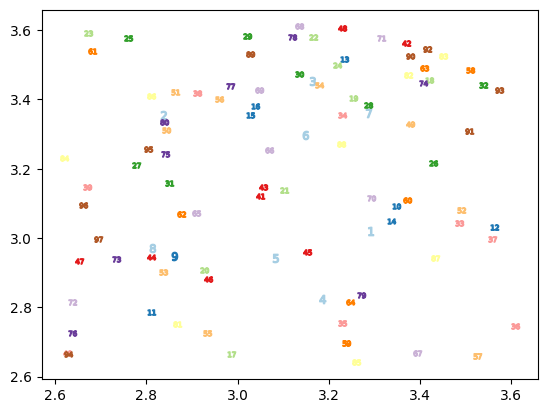

In [ ]:
colors = cm.Paired(np.linspace(0, 1, len(flat_points[0])))
colors = [col.to_hex(x, keep_alpha=False) for x in colors]

for i in range(len(flat_points[0])):
  plt.scatter(x=flat_points[0][i], y=flat_points[1][i], c=colors[i], marker=f"${i+1}$")
plt.show()

In [ ]:
filter_sub_dict_reverse = {filter_sub_dict[k]: k for k in filter_sub_dict.keys()}

In [ ]:
filter_sub_dict_reverse[3]

'Линейная алгебра и геометрия 4'

In [ ]:
filter_sub_dict_reverse[54]

'Дополнительные главы дискретной математики 1 2'

In [ ]:
filter_sub_dict_reverse[5]

'Методы оптимизации в машинном обучении 4'

In [ ]:
filter_sub_dict_reverse[71]

'Алгоритмы и структуры данных 4'

In [14]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count 
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)
    ax = plt.gca()
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15)
    

def clustering(real_distance, n):
    dist = np.empty((n,n,))
    dist[:] = 1
    for pair, value in real_distance.items():
            dist[pair[0]][pair[1]] = value**0.5
    col_mean = np.nanmean(dist, axis=0)
    col_mean[col_mean == float("inf")] = 0
    inds = np.where(np.isnan(dist))
    dist[inds] = np.take(col_mean, inds[1])
    for i in range(n):
        dist[i][i] = 0  
    dist[dist == float("inf")] = 0
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed', linkage = 'complete')
    model.fit_predict(dist)
    plt.figure(figsize = (15,7))
    plot_dendrogram(model, leaf_label_func= lambda x: str(x), truncate_mode='level', p=n)
    plt.show() 
    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


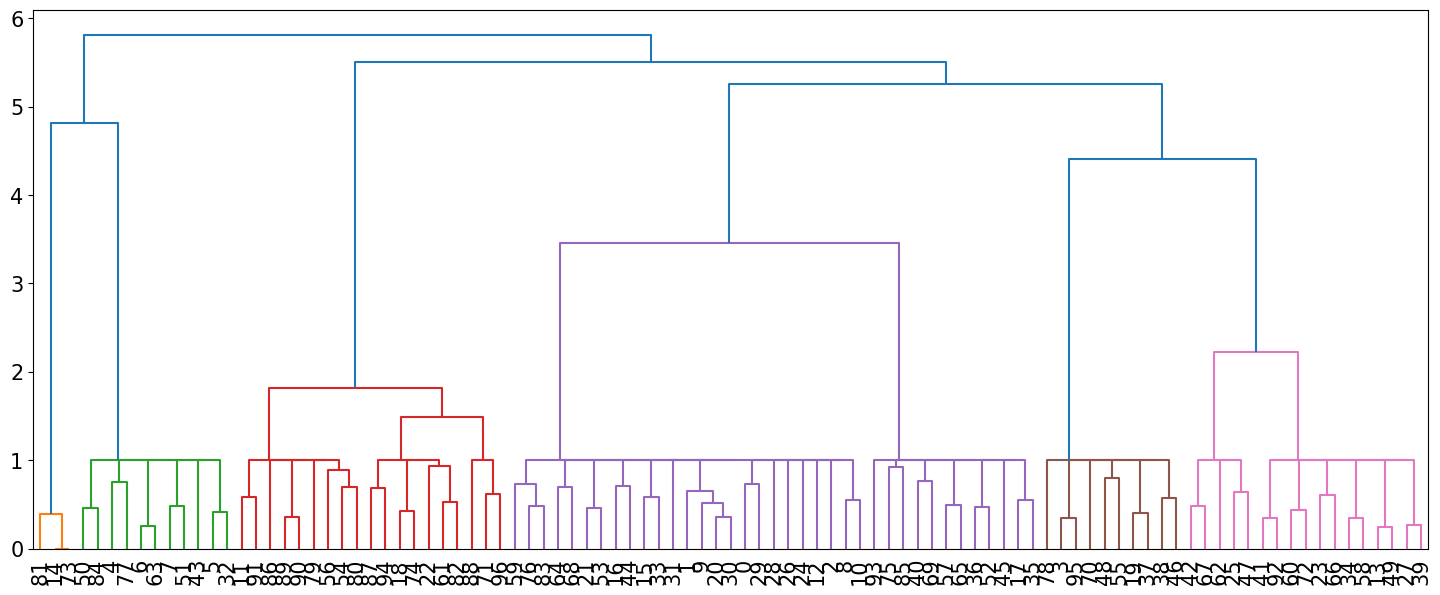

In [ ]:
clustering(real_distance, filter_subjects)

In [ ]:
filter_sub_dict_reverse[42]

'Распределенные системы 2'

In [ ]:
filter_sub_dict_reverse[67]

'Методы сжатия и передачи медиаданных 3'

In [ ]:
filter_sub_dict_reverse[62]

'Математический анализ 1 4'

In [ ]:
filter_sub_dict_reverse[77]

'Прикладная теория графов 2'

In [ ]:
filter_sub_dict_reverse[6]

'Дискретная математика 3'

In [ ]:
filter_sub_dict_reverse[63]

'Теория статистического обучения 2'

In [ ]:
filter_sub_dict_reverse[94]

'Распределенные системы 2'

In [ ]:
filter_sub_dict_reverse[52]

'Научно-исследовательский семинар "Анализ данных и искусственный интеллект" 4'

In [ ]:
filter_sub_dict_reverse[56]

'Анализ данных в бизнесе 4'

#Первый курс ПМИ

In [ ]:
sub_similarity = pd.read_csv("similarity.csv")

In [ ]:
first_sub = ["Линейная алгебра и геометрия 2", "Линейная алгебра и геометрия 4",
             "Алгебра 4", "Математический анализ 1 2", "Математический анализ 1 4", 
             "Дискретная математика 2", "Дискретная математика 3",
             "Основы и методология программирования 1",
             "Основы и методология программирования 3", 
             "Алгоритмы и структуры данных 2",
             "Алгоритмы и структуры данных 4"]

In [ ]:
first_course = sub_similarity.loc[sub_similarity["Предмет 1"].isin(first_sub) & 
                          sub_similarity["Предмет 2"].isin(first_sub)]
first_subjects = number_filter_subjects(first_course)
print("Количество предметов первого курса: ", first_subjects)
first_codes = codes(first_course, first_subjects)
first_codes

Количество предметов первого курса:  11


{'Линейная алгебра и геометрия 2': 0,
 'Основы и методология программирования 1': 1,
 'Дискретная математика 3': 2,
 'Линейная алгебра и геометрия 4': 3,
 'Основы и методология программирования 3': 4,
 'Математический анализ 1 2': 5,
 'Дискретная математика 2': 6,
 'Алгоритмы и структуры данных 4': 7,
 'Математический анализ 1 4': 8,
 'Алгебра 4': 9,
 'Алгоритмы и структуры данных 2': 10}

In [ ]:
new_first_codes = pair_codes(first_course, first_codes)
first_course["Новый код предметов"] = new_first_codes
first_distance = real_dist(first_course)

In [ ]:
first_points=get_flat_presentation(first_distance, first_subjects)

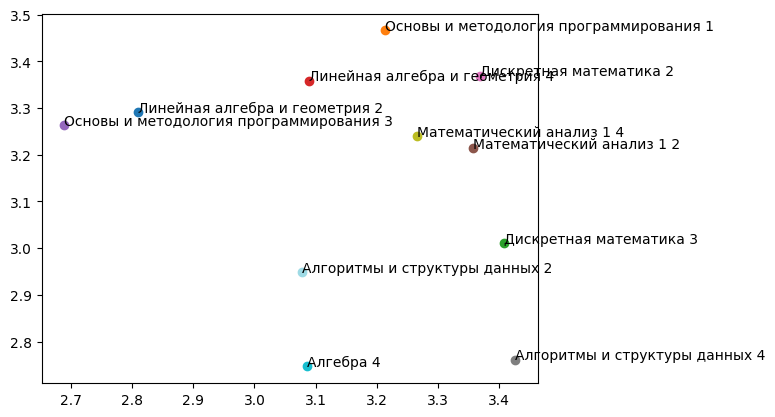

In [ ]:
colors = cm.tab20(np.linspace(0, 1, len(first_points[0])))
colors = [col.to_hex(x, keep_alpha=False) for x in colors]

for i in range(len(first_points[0])):
  plt.scatter(x=first_points[0][i], y=first_points[1][i], c=colors[i])
for i, txt in enumerate(first_codes.keys()):
    plt.annotate(txt, (first_points[0][i], first_points[1][i]))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


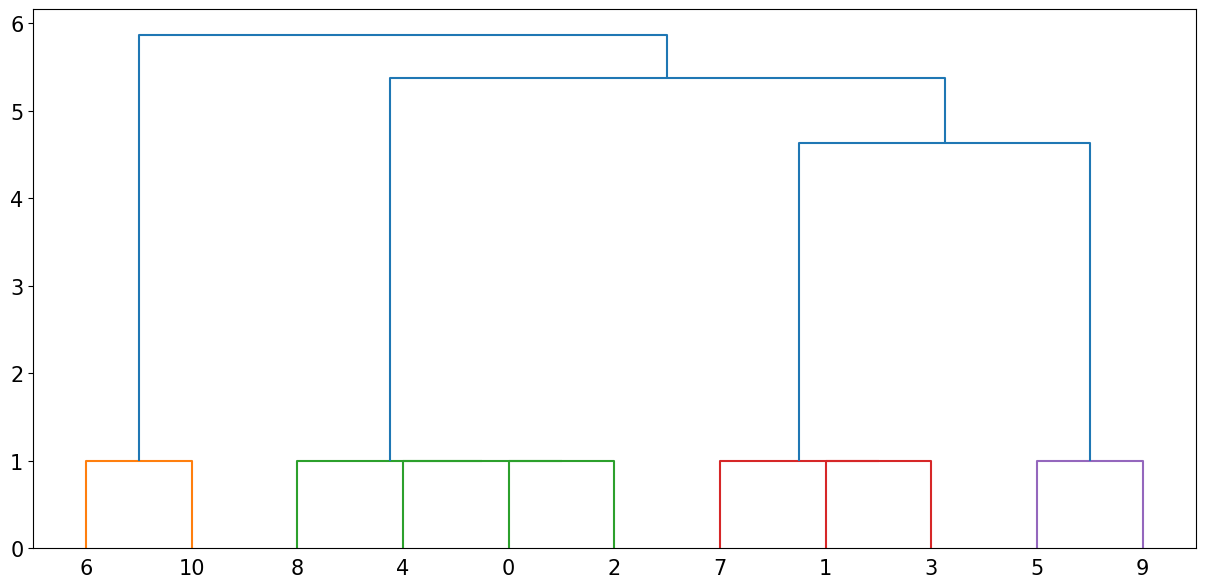

In [ ]:
clustering(first_distance, first_subjects)

In [ ]:
first_codes

{'Линейная алгебра и геометрия 2': 0,
 'Основы и методология программирования 1': 1,
 'Дискретная математика 3': 2,
 'Линейная алгебра и геометрия 4': 3,
 'Основы и методология программирования 3': 4,
 'Математический анализ 1 2': 5,
 'Дискретная математика 2': 6,
 'Алгоритмы и структуры данных 4': 7,
 'Математический анализ 1 4': 8,
 'Алгебра 4': 9,
 'Алгоритмы и структуры данных 2': 10}

#Второй курс ПМИ

In [15]:
sub_similarity = pd.read_csv("similarity.csv")

In [24]:
second_sub = ["Математический анализ 2 2", "Математический анализ 2 4", 
             "Дискретная математика 2", "Алгоритмы и структуры данных 2 1",
             "Теория вероятностей и математическая статистика 2", 
             "Теория вероятностей и математическая статистика 4",
             "Вводный научно-исследовательский семинар 3",
             "Архитектура компьютера и операционные системы 4", 
             "Дифференциальные уравнения 4"]

In [25]:
second_course = sub_similarity.loc[sub_similarity["Предмет 1"].isin(second_sub) & 
                          sub_similarity["Предмет 2"].isin(second_sub)]
second_subjects = number_filter_subjects(second_course)
print("Количество предметов первого курса: ", second_subjects)
second_codes = codes(second_course, second_subjects)
second_codes

Количество предметов первого курса:  9


{'Теория вероятностей и математическая статистика 2': 0,
 'Вводный научно-исследовательский семинар 3': 1,
 'Дискретная математика 2': 2,
 'Дифференциальные уравнения 4': 3,
 'Теория вероятностей и математическая статистика 4': 4,
 'Архитектура компьютера и операционные системы 4': 5,
 'Алгоритмы и структуры данных 2 1': 6,
 'Математический анализ 2 2': 7,
 'Математический анализ 2 4': 8}

In [ ]:
new_second_codes = pair_codes(second_course, second_codes)
second_course["Новый код предметов"] = new_second_codes
second_distance = real_dist(second_course)

In [34]:
second_points=get_flat_presentation(second_distance, second_subjects)

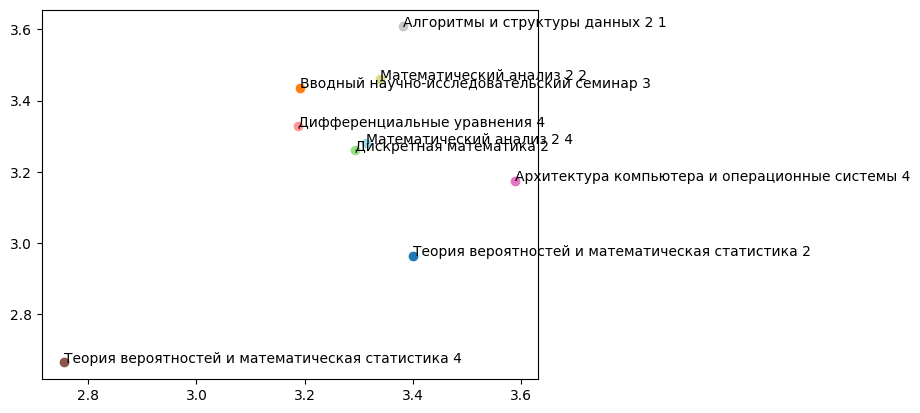

In [35]:
colors = cm.tab20(np.linspace(0, 1, len(second_points[0])))
colors = [col.to_hex(x, keep_alpha=False) for x in colors]

for i in range(len(second_points[0])):
  plt.scatter(x=second_points[0][i], y=second_points[1][i], c=colors[i])
for i, txt in enumerate(second_codes.keys()):
    plt.annotate(txt, (second_points[0][i], second_points[1][i]))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


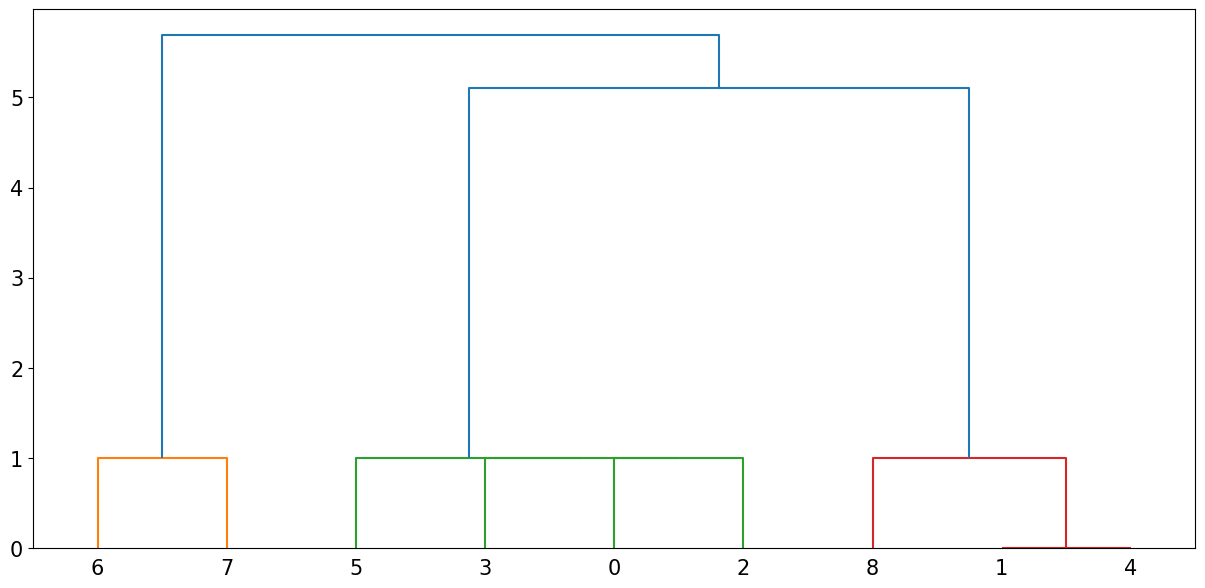

In [36]:
clustering(second_distance, second_subjects)

In [33]:
second_codes

{'Теория вероятностей и математическая статистика 2': 0,
 'Вводный научно-исследовательский семинар 3': 1,
 'Дискретная математика 2': 2,
 'Дифференциальные уравнения 4': 3,
 'Теория вероятностей и математическая статистика 4': 4,
 'Архитектура компьютера и операционные системы 4': 5,
 'Алгоритмы и структуры данных 2 1': 6,
 'Математический анализ 2 2': 7,
 'Математический анализ 2 4': 8}

#Специализация "Анализ данных и интеллектуальные системы"

In [ ]:
sub_similarity = pd.read_csv("similarity.csv")

In [ ]:
adis_sub = ["Основные методы анализа данных 2", "Машинное обучение 1 2", "Методы оптимизации 4",
        "Введение в глубинное обучение 3", "Комбинаторика, графы и булева логика 4", 
        "Автоматическая обработка текста 2", "Прикладная теория графов 2", 
        "Семантические технологии 3", "Анализ и визуализация сетей 3", 
        "Научно-исследовательский семинар \"Анализ данных и искусственный интеллект 2\" 3", 
        "Научно-исследовательский семинар \"Анализ данных и искусственный интеллект\" 4"]

In [ ]:
adis = sub_similarity.loc[sub_similarity["Предмет 1"].isin(adis_sub) & 
                          sub_similarity["Предмет 2"].isin(adis_sub)]

In [ ]:
adis_subjects = number_filter_subjects(adis)
print("Количество предметов специализации АДИС: ", adis_subjects)
adis_codes = codes(adis, adis_subjects)
adis_codes

Количество предметов специализации АДИС:  11


{'Научно-исследовательский семинар "Анализ данных и искусственный интеллект 2" 3': 0,
 'Введение в глубинное обучение 3': 1,
 'Научно-исследовательский семинар "Анализ данных и искусственный интеллект" 4': 2,
 'Машинное обучение 1 2': 3,
 'Комбинаторика, графы и булева логика 4': 4,
 'Основные методы анализа данных 2': 5,
 'Автоматическая обработка текста 2': 6,
 'Семантические технологии 3': 7,
 'Методы оптимизации 4': 8,
 'Анализ и визуализация сетей 3': 9,
 'Прикладная теория графов 2': 10}

In [ ]:
new_adis_codes = pair_codes(adis, adis_codes)
adis["Новый код предметов"] = new_adis_codes
adis_distance = real_dist(adis)

In [ ]:
adis_points=get_flat_presentation(adis_distance, adis_subjects)

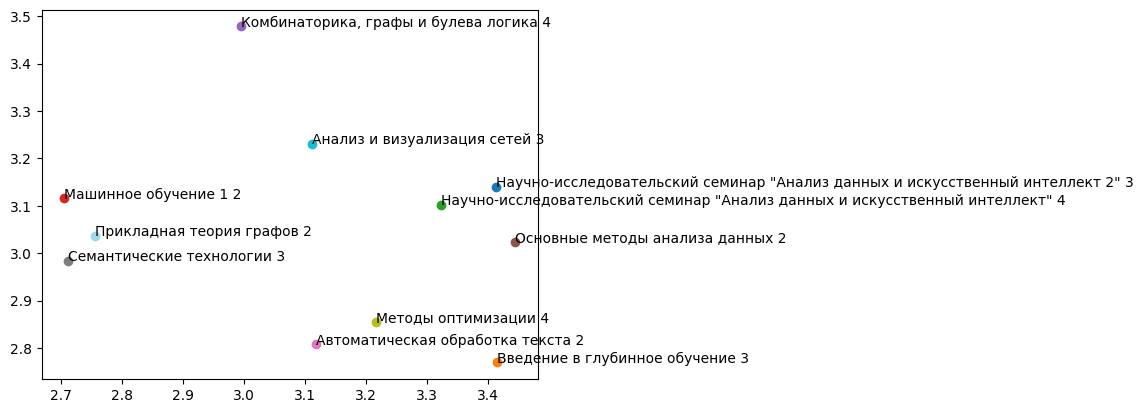

In [ ]:
colors = cm.tab20(np.linspace(0, 1, len(adis_points[0])))
colors = [col.to_hex(x, keep_alpha=False) for x in colors]

for i in range(len(adis_points[0])):
  plt.scatter(x=adis_points[0][i], y=adis_points[1][i], c=colors[i])
for i, txt in enumerate(adis_codes.keys()):
    plt.annotate(txt, (adis_points[0][i], adis_points[1][i]))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


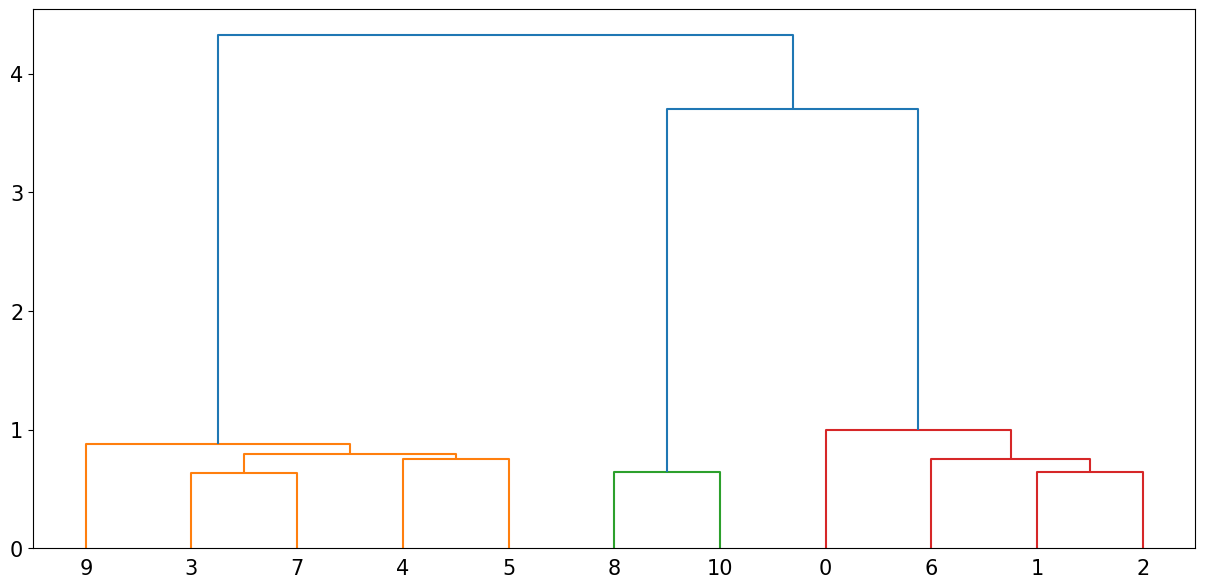

In [ ]:
clustering(adis_distance, adis_subjects)

In [ ]:
adis_codes

{'Научно-исследовательский семинар "Анализ данных и искусственный интеллект 2" 3': 0,
 'Введение в глубинное обучение 3': 1,
 'Научно-исследовательский семинар "Анализ данных и искусственный интеллект" 4': 2,
 'Машинное обучение 1 2': 3,
 'Комбинаторика, графы и булева логика 4': 4,
 'Основные методы анализа данных 2': 5,
 'Автоматическая обработка текста 2': 6,
 'Семантические технологии 3': 7,
 'Методы оптимизации 4': 8,
 'Анализ и визуализация сетей 3': 9,
 'Прикладная теория графов 2': 10}